In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf

# Tarea 2 - Regresion Polinomial & Feature engineering

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 30 de mayo. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [2]:
covid_data = pd.read_csv("covid_19_clean_complete.csv")
covid_data["Date"] = pd.to_datetime(covid_data["Date"], format="%m/%d/%y")
covid_data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0


In [3]:
covid_gt = covid_data[(covid_data["Country/Region"]=="Guatemala") & ((covid_data["Confirmed"] > 0))]
covid_gt.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
13851,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0
14115,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0
14379,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0
14643,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0
14907,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0
15171,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0
15435,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0
15699,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0


In [4]:
#Hacemos sort para hacer double check de que las fechas van en orden
covid_gt = covid_gt.sort_values("Date")
covid_gt_days = covid_gt
covid_gt_days["Days"] = range(0, len(covid_gt_days))
covid_gt_days.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Days
13851,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0,0
14115,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0,1
14379,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0,2
14643,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0,3
14907,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0,4
15171,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0,5
15435,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0,6
15699,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0,7
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,8
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,9


In [5]:
covid_gt_cases = covid_gt_days[covid_gt_days["Date"] < pd.to_datetime("5/30/20", format = "%m/%d/%y")]
covid_gt_cases

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Days
13851,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0,0
14115,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0,1
14379,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0,2
14643,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0,3
14907,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0,4
15171,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0,5
15435,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0,6
15699,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0,7
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,8
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,9


<AxesSubplot:xlabel='Days', ylabel='Confirmed'>

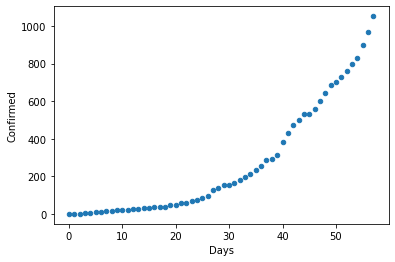

In [6]:
covid_gt_cases.plot.scatter(x = "Days",y="Confirmed")

<AxesSubplot:xlabel='Days', ylabel='ln(confirmed)'>

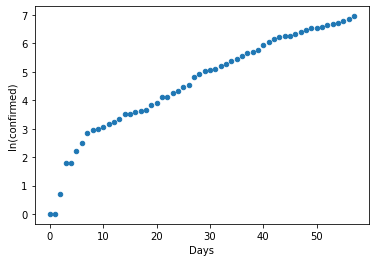

In [7]:
covid_gt_cases["ln(confirmed)"] = np.log(covid_gt_cases["Confirmed"])
covid_gt_cases.plot.scatter(x = "Days",y="ln(confirmed)")

<AxesSubplot:xlabel='Days', ylabel='ln(confirmed)'>

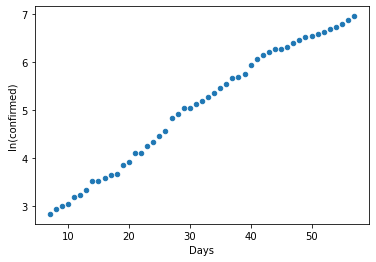

In [8]:
covid_gt_train = covid_gt_cases[covid_gt_cases["Days"] > 6]
covid_gt_train.plot.scatter(x = "Days",y="ln(confirmed)")

In [9]:
#Reutilizando codigo del proyecto de la clase anterior
def training(x, y, epochs, imprimir_error_cada=0, lr=0.01):
    x_mat = np.column_stack((x, np.ones_like(x)))
    mb = (1,1)
    y_hat = 0
    errors = []
    result = {}
    for i in range(0, epochs):
        y_hat = np.matmul(x_mat,mb)
        error = 0.5*np.mean(np.power(y-y_hat, 2))
        if (imprimir_error_cada > 0) and (((i+1) % imprimir_error_cada) == 0):
            print(error)
        errors.append(error)
        grads = np.mean((y_hat-y).reshape(-1,1) * x_mat, axis = 0)
        mb = (mb[0] - lr*grads[0], mb[1] - lr*grads[1])
        result[i+1] = (mb) 
    return result, errors
        

In [10]:
result, error = training(covid_gt_train["Days"].to_numpy(), covid_gt_train["ln(confirmed)"].to_numpy(), epochs=1000000, lr = 0.0000001)
best_model = result[np.nanargmin(error)+1]
best_model

(0.12006235040737505, 1.000124678287324)

Prediciendo para el 30 de mayo de 2020:

In [11]:
#14/03/2020 = Dia 0
#30/05/2020 = 77
np.exp(best_model[0]*77 + best_model[1])

28139.390184296903

### Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
data.corr().sort_values("quality")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Parece ser que las variables que mas se relacionan con quality son el alcohol, la acidez volatic y los sulfatos, aunque el acido citrico tambien puede ser candidato

In [16]:
def corrfunc(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

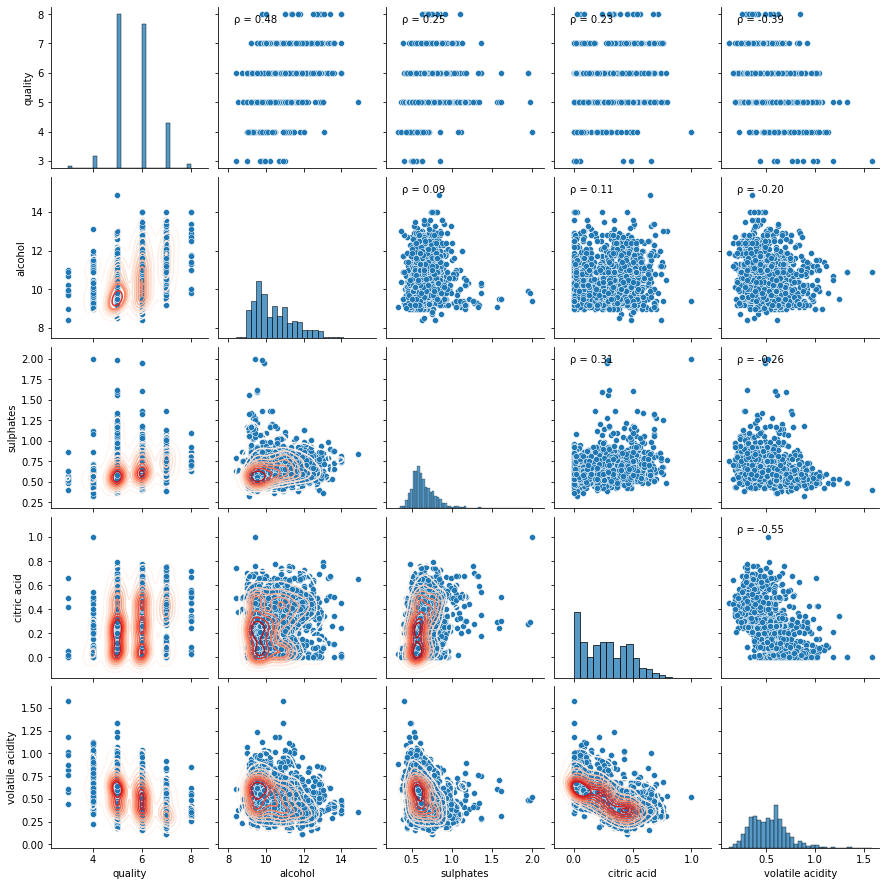

In [17]:
g = sns.pairplot(data, vars=["quality", "alcohol", "sulphates", "citric acid", "volatile acidity"])
g.map_upper(corrfunc)
g.map_lower(sns.kdeplot, cmap = 'Reds')
g

Vemos que hay una gran potencial correlacion entre los acidez citrica y la acidez volatil, pero entre las dos variables la acidez volatil epxlica de mejor manera la calidad, por lo que se descartara la acidez citrica

In [18]:
data_vars = data[["quality", "alcohol", "sulphates", "volatile acidity"]]
data_vars

,quality,alcohol,sulphates,volatile acidity
0,5,9.4,0.56,0.700
1,5,9.8,0.68,0.880
2,5,9.8,0.65,0.760
3,6,9.8,0.58,0.280
4,5,9.4,0.56,0.700
...,...,...,...,...
1594,5,10.5,0.58,0.600
1595,6,11.2,0.76,0.550
1596,6,11.0,0.75,0.510
1597,5,10.2,0.71,0.645


Determinemos los features polinomiales

In [19]:
poly = PolynomialFeatures(2)
raw_poly_arr = poly.fit_transform(data_vars[["alcohol", "sulphates", "volatile acidity"]])
poly_names = poly.get_feature_names_out(["alcohol", "sulphates", "volatile acidity"])
poly_df = pd.DataFrame(data =  raw_poly_arr, columns=poly_names)
poly_df

,1,alcohol,sulphates,volatile acidity,alcohol^2,alcohol sulphates,alcohol volatile acidity,sulphates^2,sulphates volatile acidity,volatile acidity^2
0,1.0,9.4,0.56,0.700,88.36,5.264,6.580,0.3136,0.39200,0.490000
1,1.0,9.8,0.68,0.880,96.04,6.664,8.624,0.4624,0.59840,0.774400
2,1.0,9.8,0.65,0.760,96.04,6.370,7.448,0.4225,0.49400,0.577600
3,1.0,9.8,0.58,0.280,96.04,5.684,2.744,0.3364,0.16240,0.078400
4,1.0,9.4,0.56,0.700,88.36,5.264,6.580,0.3136,0.39200,0.490000
...,...,...,...,...,...,...,...,...,...,...
1594,1.0,10.5,0.58,0.600,110.25,6.090,6.300,0.3364,0.34800,0.360000
1595,1.0,11.2,0.76,0.550,125.44,8.512,6.160,0.5776,0.41800,0.302500
1596,1.0,11.0,0.75,0.510,121.00,8.250,5.610,0.5625,0.38250,0.260100
1597,1.0,10.2,0.71,0.645,104.04,7.242,6.579,0.5041,0.45795,0.416025


Definiendo hipotesis

In [20]:
def h(w, X):
    return tf.matmul(X, w, name="Hypothesis")

Definiendo costo (MSE)

In [21]:
def mse(y_pred, y_true):
    return 0.5*tf.reduce_mean(tf.square(y_pred - y_true), name="mse")

Definamos funcion de entrenamiento

In [22]:
@tf.function
def poly_train(X, y, epochs = 1000, lr = 0.001, batch_size = 64):
    logdir = f'logs\\lm_bs={batch_size}_lr={lr}_epochs={epochs}'
    
    iterations = int(y.shape[0]/batch_size)
    step = 0
    for epoch in range(epochs):
        for i in range(iterations): 
            with tf.name_scope("batch_creation"):
                batch_start = i*batch_size
                batch_end = batch_start + batch_size
                X_b = X[batch_start:batch_end]
                y_b = y[batch_start:batch_end]
            
            with tf.name_scope("gradient_calc"):
                with tf.GradientTape() as grad_tape:
                    grad_tape.watch(w)
                    y_pred = h(w, X_b)
                    error = mse(y_pred, y_b)

            with tf.name_scope("parameter_updating"):
                grad_w = grad_tape.gradient(error,w)
                w.assign_sub(grad_w*lr)
            step = step + 1
            tf.summary.scalar('MSE', error, step=step)
            
    return w

In [23]:
#Creando grafo
logdir = f'logs\\lm_bs={len(data_vars)}_lr={0.001}_epochs={1}'
writer = tf.summary.create_file_writer(logdir)

with writer.as_default():
    tf.summary.trace_on(graph=True, profiler=False)
    w = tf.Variable(initial_value = tf.cast(tf.ones([raw_poly_arr.shape[1], 1]), tf.float64))
    final_params = poly_train(raw_poly_arr, tf.cast(data_vars["quality"], tf.float64), lr = 0.001, batch_size=len(data_vars), epochs = 1)
    tf.summary.trace_export(
                          name="model_graph",
                          step=0,
                          profiler_outdir="logs\\modelgraph")
writer.flush()
final_params

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[  0.86980192],
       [ -0.38392225],
       [  0.91362809],
       [  0.93188158],
       [-13.8788903 ],
       [  0.07958593],
       [  0.28168547],
       [  0.93902296],
       [  0.95585775],
       [  0.96006955]])>

Grafo

![alt text](graph.PNG "Grafo")

In [24]:
import itertools
tf.config.run_functions_eagerly(True)
lrs = [0.0001, 0.00001, 0.000001]
epochs = [100, 1000]
batch_sizes = [400, 600]

for lr, epoch, batch_size in list(itertools.product(lrs, epochs, batch_sizes)):
    logdir = f'logs\\lm_bs={batch_size}_lr={lr}_epochs={epoch}'
    writer = tf.summary.create_file_writer(logdir)

    with writer.as_default():
        w = tf.Variable(initial_value = tf.cast(tf.ones([raw_poly_arr.shape[1], 1]), tf.float64), name="w")
        final_params = poly_train(raw_poly_arr, tf.cast(data_vars["quality"], tf.float64), lr = lr, batch_size=batch_size, epochs = epoch)
    writer.flush()
    print(final_params)

<tf.Variable 'w:0' shape=(10, 1) dtype=float64, numpy=
array([[ 0.97519092],
       [ 0.81506433],
       [ 0.97411408],
       [ 0.97597657],
       [-0.11881938],
       [ 0.78317406],
       [ 0.78435175],
       [ 0.96946773],
       [ 0.97985686],
       [ 0.97998582]])>
<tf.Variable 'w:0' shape=(10, 1) dtype=float64, numpy=
array([[ 0.9796887 ],
       [ 0.83855842],
       [ 0.98001769],
       [ 0.9820611 ],
       [-0.13464599],
       [ 0.82749061],
       [ 0.83631195],
       [ 0.97768764],
       [ 0.98529155],
       [ 0.98556695]])>
<tf.Variable 'w:0' shape=(10, 1) dtype=float64, numpy=
array([[ 0.91851684],
       [ 0.51366443],
       [ 0.88839265],
       [ 0.89576741],
       [-0.02751966],
       [ 0.10397957],
       [ 0.08243986],
       [ 0.84703436],
       [ 0.90454231],
       [ 0.90513289]])>
<tf.Variable 'w:0' shape=(10, 1) dtype=float64, numpy=
array([[ 0.93000919],
       [ 0.57412996],
       [ 0.90922221],
       [ 0.91460611],
       [-0.05332053],
    

Observando MSEs

![alt text](MSEs.PNG "MSEs")

![alt text](MSEs_best.PNG "Best MSEs")

Parece ser que el mejor modelo es aquel con un batch size de 600, un lr de 0.0001 y 1000 epochs